<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Campeonato_Brasileiro_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Conhecendo o Dataframe

O Campeonato Brasileiro é a principal competição de futebol do Brasil, envolvendo clubes das diferentes regiões do país. A competição é organizada pela Confederação Brasileira de Futebol (CBF) e acontece anualmente, geralmente de maio a dezembro.

No Campeonato Brasileiro, os clubes se enfrentam em um sistema de pontos corridos, onde todas as equipes jogam entre si em partidas de ida e volta. Cada vitória rende três pontos, o empate rende um ponto para cada time e a derrota não pontua.

O campeonato é dividido em séries, sendo a Série A a divisão de elite. Ao final das 38 rodadas, o clube com o maior número de pontos é declarado o campeão brasileiro. Além do campeão, os times que terminam nas primeiras posições também se classificam para a Copa Libertadores, a principal competição de clubes da América do Sul.

O Campeonato Brasileiro também possui um sistema de rebaixamento, onde os clubes que terminam nas últimas posições da tabela são rebaixados para a Série B, a segunda divisão do futebol brasileiro.

O torneio é conhecido por sua intensidade e competitividade, com grandes clubes brasileiros como Flamengo, Palmeiras, São Paulo, Santos, Corinthians e outros disputando o título. A história do Campeonato Brasileiro é rica em rivalidades, jogadores talentosos e momentos emocionantes que cativam os fãs do futebol no Brasil e ao redor do mundo.

Para inicio do projeto será necessário importar o arquivo CSV, como estou utilizando o Virtual Studio e o arquivo está na minha maquina se fez necessário eu copiar o caminho do arquivo para auxiliar o pandas a encontra-lo e transforma-lo em Dataframe, para a importação do arquivo e a sua transformação em Dataframe se faz necessário utulizar o comando pandas(pd).read_csv('Caminho do arquivo').

In [198]:
path_full = '/content/campeonato-brasileiro-full.csv'

df = pd.read_csv(path_full)

Após a importação dos dados, se faz necessário conhecer esse dataframe para ter conhecimento de informações iniciais como dados faltantes, tipo das colunas entre outros que são necessário para iniciar a analise.
Para conhecer um pouco o Dataframe utiliza-se os comando .head() e .tail(), onde esses caso não modificados irão mostrar as 5 primeiras linhas(head) e as 5 ultimas linhas(tail) do dataframe.

In [199]:
df.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


Utilizando os head() e o tail() se confirma algumas situações:
- As colunas do banco de dados são autoexplicativas, facilitando ainda mais a analise inicial dele;
- Os dados do campeoanto Brasileiro se iniciam no ano de 2003 (Primeiro jogo do campeonato brasileiro de 2003) e finalizam no ano de 2022 (Ultimo jogo do campeonato brasileiro 2022);
- Algumas colunas iniciais estão nulas ('formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante').

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8025 non-null   int64 
 1   rodata              8025 non-null   int64 
 2   data                8025 non-null   object
 3   hora                8025 non-null   object
 4   mandante            8025 non-null   object
 5   visitante           8025 non-null   object
 6   formacao_mandante   3051 non-null   object
 7   formacao_visitante  3051 non-null   object
 8   tecnico_mandante    3415 non-null   object
 9   tecnico_visitante   3415 non-null   object
 10  vencedor            8025 non-null   object
 11  arena               8025 non-null   object
 12  mandante_Placar     8025 non-null   int64 
 13  visitante_Placar    8025 non-null   int64 
 14  mandante_Estado     8025 non-null   object
 15  visitante_Estado    8025 non-null   object
dtypes: int64(4), object(12)


Utilizando o comando .info(), foi constatado que:
- O dataframe possui 8025 linhas e tem 16 colunas
- Foi confirmado que as colunas 'formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante' não possuem todos os dados;
- Apenas as colunas ID, rodata, mandante_Placar, visitante_Placar são numericas.

## Explorando o dataframe

Como o objetivo desse notebook é explorar as informações fornecidas pelo Banco de Dados sobre o campeoanto Brasileiro, nada melhor que iniciar a exploração conhecendo todos os times que já participaram do campeonato. Para isso será utilizado o comando .unique() para que possamos observar apenas os dados unicos da coluna, caso esse dado venha se repetir, ele não será contabilizado novamente por esse comando.

In [201]:
print(df.mandante.unique())

print(f' Total:{len(df.mandante.unique())} times')

['Guarani' 'Athletico-PR' 'Flamengo' 'Goias' 'Internacional' 'Criciuma'
 'Juventude' 'Fortaleza' 'Cruzeiro' 'Vitoria' 'Santos' 'Corinthians'
 'Fluminense' 'Atletico-MG' 'Coritiba' 'Gremio' 'Bahia' 'Figueirense'
 'Paysandu' 'Ponte Preta' 'Parana' 'Sao Caetano' 'Sao Paulo' 'Vasco'
 'Botafogo-RJ' 'Palmeiras' 'Brasiliense' 'Santa Cruz' 'America-RN' 'Sport'
 'Nautico' 'Ipatinga' 'Portuguesa' 'Avai' 'Santo Andre' 'Barueri'
 'Atletico-GO' 'Ceara' 'Gremio Prudente' 'America-MG' 'Chapecoense'
 'Joinville' 'CSA' 'Bragantino' 'Cuiaba']
 Total:45 times


Juntando o comando .unique com o len() foi possivel observar que nesses ultimos 19 anos apenas 45 times conseguiram participar da serie A do Campeonato Brasileiro. Esses comando são muito utilizados para conhecer os valores pertencentes a determinada coluna, uma outra informação importante que podemos retirar com o mesmo comando, é quais estados já tiveram representantes nesses ultimos anos.

In [202]:
#Verificando quais estados com o comando .unique()

df.mandante_Estado.unique()

array(['SP', 'PR', 'RJ', 'GO', 'RS', 'SC', 'CE', 'MG', 'BA', 'PA', 'DF',
       'PE', 'RN', 'AL', 'MT'], dtype=object)

Podemos observar que apenas 15 estados foram representados nesses utilmos anos no campeonato braileior e apenas os estados do Maranhão, Tocantins, Acre, Roraima, Amazonas, Sergipe, Rondonia, Piaui, Amapá não tiveram algum time representantes entre esse anos.

In [203]:
primeira_linha_nula = df[df.tecnico_mandante.notna()].iloc[0]
print(primeira_linha_nula)


#Primeiro ano que foi computado o técnico foi em 2014 (primiera rodada)

ID                                    4607
rodata                                   1
data                             19/4/2014
hora                                 18:28
mandante                        Fluminense
visitante                      Figueirense
formacao_mandante                      NaN
formacao_visitante                     NaN
tecnico_mandante      C. Borges dos Santos
tecnico_visitante              V. Eutrópio
vencedor                        Fluminense
arena                             Maracanã
mandante_Placar                          3
visitante_Placar                         0
mandante_Estado                         RJ
visitante_Estado                        SC
Name: 4606, dtype: object


Indo um pouco mais afundo nos dados apresentados, pode ser observado quantos jogos cada time jogos nesses utlimo anos. Para essa situação um novo comando será utilizado .value_counts(), diferente do .unique() esse comando calcula a quantidade de vezes que determinado elemento aparece na coluna.

In [204]:
#Criando uma variavel com a quantidade de vezes cada elemento aparece na coluna mandante.

df_mandante = df.mandante.value_counts()

In [205]:
#Criando uma variavel com a quantidade de vezes cada elemento aparece na coluna visitante.

df_visitante = df.visitante.value_counts()

Para melhor compreensão e para futuras trocas de informações que possam necessitar desses dados encontrados, os valores encontrados foram armazenados em uma variavel.

Como os dados apresentados estão divididos entre mandantes e visitantes, se faz necessário somar as duas colunas para saber a quantidade total de jogos.Novamente uma variavel foi criada mas agora com a soma dos valores de mandantes e visitantes encontrados.

In [206]:
df_total = df_mandante + df_visitante
print(df_total.sort_values(ascending = False))

Flamengo           780
Santos             780
Fluminense         780
Sao Paulo          780
Athletico-PR       742
Corinthians        742
Internacional      742
Atletico-MG        741
Gremio             700
Palmeiras          696
Cruzeiro           666
Botafogo-RJ        658
Vasco              590
Goias              552
Coritiba           552
Figueirense        438
Sport              418
Vitoria            396
Bahia              388
Ponte Preta        362
Juventude          286
Fortaleza          278
Ceara              266
Atletico-GO        266
Avai               266
Chapecoense        265
Parana             248
Nautico            190
America-MG         190
Sao Caetano        172
Criciuma           168
Paysandu           134
Guarani            130
Portuguesa         114
Bragantino         114
Cuiaba              76
Santa Cruz          76
Brasiliense         42
Joinville           38
Ipatinga            38
CSA                 38
Santo Andre         38
Barueri             38
Gremio Prud

Podemos observar que apenas o FLAMENGO, Fluminense, São Paulo e Santos foram o unicos times que não rebaixaram durante esse tempo. Vale lembrar que as temporadas de 2003-2005 foram marcadas com a presença de 24 times e somente a partir de 2006 teve a mudança para 20 times em definitivo.

## Verificando quanto cada time ganhou, empatou e perdeu

### Vitorias

Com o objetivo de saber ainda mais sobre os times, se faz necessário saber
 quais são os times mais vitoriosos do campeoanot brasileiro, e para isso também se faz necessario utilizar apenas o comando .value_counts() na coluna 'Vencedores' já que nesta coluna se encontra os vencedores de cada jogo.

In [207]:
#Verificando os maiores vencedores.
vitorias = df.vencedor.value_counts()
print(vitorias)

-                  2123
Sao Paulo           351
Flamengo            335
Santos              329
Internacional       324
Corinthians         314
Palmeiras           309
Atletico-MG         308
Fluminense          306
Gremio              295
Athletico-PR        295
Cruzeiro            293
Botafogo-RJ         229
Goias               200
Vasco               196
Coritiba            181
Figueirense         142
Sport               131
Vitoria             123
Bahia               115
Ponte Preta         114
Fortaleza            93
Juventude            85
Parana               83
Atletico-GO          72
Ceara                72
Chapecoense          70
Avai                 66
Sao Caetano          65
Nautico              54
America-MG           53
Criciuma             50
Paysandu             41
Bragantino           38
Guarani              36
Portuguesa           31
Cuiaba               20
Santa Cruz           15
Barueri              12
Santo Andre          11
Brasiliense          10
Ipatinga        

Levando em consideração que os '-' são quando os jogos terminam em empate, podemos ver como a quantidade de jogos realmente influencia nessa analise já que São Paulo, Flamengo e Santos foram os times que mais venceram no campeonato. Já o caso do Fluminense poderemos tirar melhores conclusões com o avanço do projeto.

Para futuas analises, essa informação será transformada em um Dataframe.
- Para melhor identifacação das colunas, estas serão renomeadas.

In [208]:
#Criando um dataframe
df_vitorias = pd.DataFrame(vitorias).reset_index()

#Renomenado Coluna
df_vitorias.columns = ['Time', 'Vitorias']

df_vitorias

,Time,Vitorias
0,-,2123
1,Sao Paulo,351
2,Flamengo,335
3,Santos,329
4,Internacional,324
5,Corinthians,314
6,Palmeiras,309
7,Atletico-MG,308
8,Fluminense,306
9,Gremio,295


In [209]:
#Retirando o valor nulo da tabela.

df_vitorias = df_vitorias.drop(df_vitorias.index[0]).reset_index(drop = True)

df_vitorias

,Time,Vitorias
0,Sao Paulo,351
1,Flamengo,335
2,Santos,329
3,Internacional,324
4,Corinthians,314
5,Palmeiras,309
6,Atletico-MG,308
7,Fluminense,306
8,Gremio,295
9,Athletico-PR,295


### Empates

Como o futebol não é somente baseado em vitorias, se faz necessário conhecer a quantidade de empates e derrotas.

In [210]:
#Verificado a quantidade de empates dos times como mandantes
contagens_empates_mandante = {}

# Loop para contar as ocorrências de cada item
for mandante, vitoria in zip(df['mandante'], df['vencedor']):
  #Condicional para verificar se os dados da coluna vencedor são iguais a "-"
    if vitoria == '-':
      #Condicional para verificar se esse dado que está na coluna Mantentes já estão presente no dicionario
        if mandante in contagens_empates_mandante:
            contagens_empates_mandante[mandante] += 1
        else:
            contagens_empates_mandante[mandante] = 1

print(sorted(contagens_empates_mandante.items(), key=lambda x: x[1], reverse=True))
print(sum(contagens_empates_mandante.values()))

[('Sao Paulo', 108), ('Fluminense', 107), ('Flamengo', 99), ('Santos', 99), ('Corinthians', 99), ('Athletico-PR', 94), ('Vasco', 89), ('Botafogo-RJ', 89), ('Internacional', 88), ('Gremio', 83), ('Atletico-MG', 80), ('Cruzeiro', 79), ('Palmeiras', 77), ('Goias', 71), ('Figueirense', 69), ('Coritiba', 69), ('Bahia', 59), ('Sport', 58), ('Vitoria', 53), ('Juventude', 51), ('Ceara', 48), ('Avai', 45), ('Atletico-GO', 41), ('Ponte Preta', 40), ('Chapecoense', 37), ('Fortaleza', 35), ('Parana', 30), ('America-MG', 27), ('Portuguesa', 23), ('Guarani', 22), ('Sao Caetano', 20), ('Nautico', 19), ('Bragantino', 19), ('Criciuma', 18), ('Paysandu', 16), ('Cuiaba', 14), ('Brasiliense', 7), ('Barueri', 7), ('Joinville', 7), ('Santa Cruz', 6), ('Santo Andre', 5), ('Gremio Prudente', 5), ('CSA', 5), ('America-RN', 3), ('Ipatinga', 3)]
2123


In [211]:
#Criando um dataframe para Empates dos times como mandantes
df_empates_mandante = pd.DataFrame(pd.Series(contagens_empates_mandante).sort_values(ascending = False)).reset_index()

#Renomeando Colunas do dataframe
df_empates_mandante.columns = ['Time', 'Empates Mandante']

df_empates_mandante

,Time,Empates Mandante
0,Sao Paulo,108
1,Fluminense,107
2,Flamengo,99
3,Corinthians,99
4,Santos,99
5,Athletico-PR,94
6,Botafogo-RJ,89
7,Vasco,89
8,Internacional,88
9,Gremio,83


In [212]:
#Verificado a quantidade de empates dos times como mandantes
contagens_empates_visitante = {}

# Loop para contar as ocorrências de cada item
for mandante, vitoria in zip(df['visitante'], df['vencedor']):
  #Condicional para verificar se os dados da coluna vencedor são iguais a "-"
    if vitoria == '-':
      #Condicional para verificar se esse dado que está na coluna Mantentes já estão presente no dicionario
        if mandante in contagens_empates_visitante:
            contagens_empates_visitante[mandante] += 1
        else:
            contagens_empates_visitante[mandante] = 1

print(sorted(contagens_empates_visitante.items(), key=lambda x: x[1], reverse=True))
print(sum(contagens_empates_visitante.values()))

[('Corinthians', 116), ('Flamengo', 113), ('Sao Paulo', 110), ('Atletico-MG', 110), ('Santos', 108), ('Internacional', 104), ('Palmeiras', 103), ('Fluminense', 98), ('Gremio', 97), ('Botafogo-RJ', 91), ('Vasco', 88), ('Athletico-PR', 81), ('Coritiba', 76), ('Cruzeiro', 72), ('Goias', 60), ('Figueirense', 55), ('Bahia', 54), ('Ponte Preta', 51), ('Sport', 49), ('Vitoria', 46), ('Ceara', 44), ('Chapecoense', 40), ('Atletico-GO', 38), ('Fortaleza', 35), ('Avai', 28), ('Parana', 25), ('Juventude', 25), ('America-MG', 25), ('Sao Caetano', 21), ('Criciuma', 20), ('Bragantino', 20), ('Nautico', 19), ('Guarani', 17), ('Paysandu', 15), ('Portuguesa', 15), ('Cuiaba', 14), ('Santa Cruz', 8), ('Barueri', 6), ('Brasiliense', 5), ('Ipatinga', 5), ('Gremio Prudente', 5), ('Santo Andre', 3), ('Joinville', 3), ('CSA', 3), ('America-RN', 2)]
2123


In [213]:
#Criando um dataframe para Empates do times visitantes
df_empates_visitante = pd.DataFrame(pd.Series(contagens_empates_visitante).sort_values(ascending = False)).reset_index()

#Renomenado Colunas
df_empates_visitante.columns = ['Time', 'Empates Visitante']

df_empates_visitante

,Time,Empates Visitante
0,Corinthians,116
1,Flamengo,113
2,Sao Paulo,110
3,Atletico-MG,110
4,Santos,108
5,Internacional,104
6,Palmeiras,103
7,Fluminense,98
8,Gremio,97
9,Botafogo-RJ,91


Fazendo uma rápida analise nessa situação, verificamos que:
- Novamente os times que mais jogaram o campeonato Brasileiro ainda continuam tendo um destaque na quantidade de empates;
- Foi possivel verificar que a quantidade de empates como mandantes e visitantes não tem uma desvio muito grande em relação a quantidade;
- Podemos dar um destaque ao Corithians como visitantes, já que esse time não está em os 4 times que mais jogaram mas esse foi o time que mais empatou como visitante;

Esses dois dataframes foram criandos com o intuito de descobrir a quantidade de vezes que cada time que jogou como mandante empatou e também a quantidade de vezes que esses times que jogaram também como visitantes empataram.

Alguns situações a serem pontuadas que irão se repetir ao longo de toda a analise que ajudará muito na crianção dos dataframe:
- Mudança no nome das colunas: A mudança de nome das colunas além de melhor explicar o que cada coluna está mostrando, ela também no ajuda quando iremos juntar dois dataframe pois o comando .merge() necessita de uma coluna referencia para que ela possa utilizar para que não possa dar digervencias ao juntar os dados presentes nas tabelas, isso serve para que o sistema procure os dados que representam aquele determinado item na coluna sinalizada.
- Criação de novas colunas e exclusão de antigas: O objetivo da criação de novas colunas é apenas para termos o emlhor entedimento de determinado assuntos, buscar apenas dados separados (mandantes e visitante) não nos dará o conhecimento completo de determinado assunto.

In [214]:
#Criando um novo dataframe com a junção dos dataframe de empate dos times mandantes e visitantes.
df_empates = pd.merge(df_empates_mandante, df_empates_visitante, on = 'Time')

#Criando uma nova coluna que soma os valorees das colunas de Empates Mandantes e Empates Visitantes.
df_empates['Empate'] = df_empates['Empates Mandante'] + df_empates['Empates Visitante']

#Excluindo as colunas para deixar apenas a coluna com o somatorio dos empates.
df_empates = df_empates.drop(['Empates Mandante', 'Empates Visitante'], axis = 1)

In [215]:
#Criando um dataframe que uni os dataframes de Vitorias e de Empates.
df_concatenado = pd.merge(df_vitorias, df_empates, on = 'Time')

df_concatenado

,Time,Vitorias,Empate
0,Sao Paulo,351,218
1,Flamengo,335,212
2,Santos,329,207
3,Internacional,324,192
4,Corinthians,314,215
5,Palmeiras,309,180
6,Atletico-MG,308,190
7,Fluminense,306,205
8,Gremio,295,180
9,Athletico-PR,295,175


Esse dataframe é apenas uma parte do dataframe final que estamos com o objetivo de conseguir, nesse ainda consta apenas as vitorias e os empates de cada time, sendo necessário a verificação de perdas que cada time teve.

### Perdas

Para a criação da coluna de perdas, um processo um pouco mais prático e rápido pode ser feito. Para que isso ocorra será necressário apenas juntar a quantidade total de jogos e subtrair pela soma da quantidade de vitoras e empates de cada time.

In [216]:
#Criando um dataframe do total de jogos
df_partidas = pd.DataFrame(df_total).reset_index()

#Renomeando as colunas do dataframe
df_partidas.columns = ['Time', 'Jogos']

df_partidas

,Time,Jogos
0,America-MG,190
1,America-RN,38
2,Athletico-PR,742
3,Atletico-GO,266
4,Atletico-MG,741
5,Avai,266
6,Bahia,388
7,Barueri,38
8,Botafogo-RJ,658
9,Bragantino,114


In [217]:
#Criando uma novo dataframe com a junção dos dataframe df_concatenado e df_partidas
df_jogos = pd.merge(df_concatenado, df_partidas, on = 'Time')

df_jogos

,Time,Vitorias,Empate,Jogos
0,Sao Paulo,351,218,780
1,Flamengo,335,212,780
2,Santos,329,207,780
3,Internacional,324,192,742
4,Corinthians,314,215,742
5,Palmeiras,309,180,696
6,Atletico-MG,308,190,741
7,Fluminense,306,205,780
8,Gremio,295,180,700
9,Athletico-PR,295,175,742


In [218]:
#Criando uma coluna 'Perdas' nesse novo dataframe
df_jogos['Perdas'] = df_jogos['Jogos'] - (df_jogos['Vitorias'] + df_jogos['Empate'])

df_jogos

,Time,Vitorias,Empate,Jogos,Perdas
0,Sao Paulo,351,218,780,211
1,Flamengo,335,212,780,233
2,Santos,329,207,780,244
3,Internacional,324,192,742,226
4,Corinthians,314,215,742,213
5,Palmeiras,309,180,696,207
6,Atletico-MG,308,190,741,243
7,Fluminense,306,205,780,269
8,Gremio,295,180,700,225
9,Athletico-PR,295,175,742,272


In [219]:
#Excluindo a coluna 'Jogos'
df_jogos.pop('Jogos')

0     780
1     780
2     780
3     742
4     742
5     696
6     741
7     780
8     700
9     742
10    666
11    658
12    552
13    590
14    552
15    438
16    418
17    396
18    388
19    362
20    278
21    286
22    248
23    266
24    266
25    265
26    266
27    172
28    190
29    190
30    168
31    134
32    114
33    130
34    114
35     76
36     76
37     38
38     38
39     42
40     38
41     38
42     38
43     38
44     38
Name: Jogos, dtype: int64

### Tabela Final

In [220]:
df_jogos = pd.merge(df_jogos, df_partidas, on = 'Time')

df_jogos

,Time,Vitorias,Empate,Perdas,Jogos
0,Sao Paulo,351,218,211,780
1,Flamengo,335,212,233,780
2,Santos,329,207,244,780
3,Internacional,324,192,226,742
4,Corinthians,314,215,213,742
5,Palmeiras,309,180,207,696
6,Atletico-MG,308,190,243,741
7,Fluminense,306,205,269,780
8,Gremio,295,180,225,700
9,Athletico-PR,295,175,272,742


Com a tabela bem mais organizada, foi possivel constatar:
- O São Paulo é o time que mais venceu e empatou no campeonato;
- O Fluminense mesmo com a mesma quantidade de jogos que São Paulo, Flamengo e Santos não conseguiu ter uma posição de destaque entre os times ficando atrás em numeros de vitorias e empate de times que não tiveram a mesma quantidade de jogos que ele;
- Times de menores expressões não conseguem se manter na série A por muito tempo devido a grande diferença entre o numero de perdas em relação a empates e vitorias, sendo que alguns só conseguiram participar 1 vez da série A.

## Melhores Mandantes e Melhores Visitantes

Visando ir mais afundo no desempenho dos times no campeonato, se faz necessário analisar os melhores times como mandantes e visitantes.

In [221]:
#Criando uma nova coluna no dataframe original
df['resultado'] = df.mandante_Placar - df.visitante_Placar
df['resultado'].tail()

8020    1
8021   -1
8022   -1
8023    3
8024   -4
Name: resultado, dtype: int64

A crianção dessa coluna vem com o objetivo de simplificar e facilitar futuras analises que serão feitas nesse dataframe.

Entendendo a nova coluna 'resultado':
- Quando o valor é positivo nessa coluna significa que o time mandante ganhou com uma difença de X gols;
- Quando o valor é zero, significa que foi empate o jogo;
- Quando o valor é negativo significa que o time visitante ganhou com uma diferença de X gols.


### Melhor Visitante

De inicio iremos verificar o melhor visitante, para essa analise o mesmo sistema de verificações será feito, onde:

In [222]:
#Contagem de times vencedores - Visitantes

#Criando um dicionario
contagens_visitantes = {}

# Loop para contar as ocorrências de cada item
for item, resultado in zip(df['visitante'], df['resultado']):
  #Verificando se o item não é nulo e se o valor da coluna resultado é menor que zero
    if item is not None and resultado < 0:
      # Verificando se item está presente no dicionario
        if item in contagens_visitantes:
            contagens_visitantes[item] += 1
        else:
            contagens_visitantes[item] = 1

print(contagens_visitantes)

{'Atletico-MG': 101, 'Internacional': 104, 'Flamengo': 121, 'Vitoria': 36, 'Cruzeiro': 109, 'Santos': 105, 'Coritiba': 45, 'Fluminense': 114, 'Corinthians': 109, 'Criciuma': 10, 'Sao Paulo': 130, 'Goias': 65, 'Guarani': 6, 'Paysandu': 6, 'Juventude': 25, 'Sao Caetano': 22, 'Vasco': 66, 'Figueirense': 47, 'Parana': 24, 'Ponte Preta': 31, 'Fortaleza': 29, 'Athletico-PR': 84, 'Gremio': 91, 'Bahia': 35, 'Palmeiras': 111, 'Botafogo-RJ': 78, 'Brasiliense': 4, 'Santa Cruz': 2, 'America-RN': 2, 'Sport': 34, 'Nautico': 12, 'Portuguesa': 7, 'Santo Andre': 3, 'Barueri': 2, 'Avai': 22, 'Ceara': 20, 'Gremio Prudente': 2, 'Atletico-GO': 29, 'America-MG': 13, 'Chapecoense': 22, 'Joinville': 1, 'CSA': 2, 'Bragantino': 13, 'Cuiaba': 7}


In [223]:
#Criando um dataframe com a contagem de vitorias como visita
df_cv = pd.DataFrame(pd.Series(contagens_visitantes).sort_values(ascending = False))

#Resetando o index
df_cv = df_cv.reset_index()

#Mudando o nome das colunas
df_cv.columns = ['Time', 'Vitorias_Visitante']

df_cv

,Time,Vitorias_Visitante
0,Sao Paulo,130
1,Flamengo,121
2,Fluminense,114
3,Palmeiras,111
4,Cruzeiro,109
5,Corinthians,109
6,Santos,105
7,Internacional,104
8,Atletico-MG,101
9,Gremio,91


- O São Paulo novamente se destaca sendo o time visitante mais vitoriso do campeonato;
- Entre os 4 times que mais tiveram jogos no campeonato o que pior se sae como visitante é O Santos ficando em sexto lugar entre os melhores visitantes;
- Outro destaque que podemos dar é para o Palmeiras que mesmo tendo jogado apenas ***X*** temporadas, conseguiu ficar em destaque como melhor visitante. Isso se deu devido ao crescimento do time nos ultimos anos (2020 - 2022) onde o time veio ganhando mais relevancia no cenário esportivo;
- Também podemos verificar que times de menores expressões são os que menos conseguem vencer fora de casa, isso situação acaba explicando a baixa participação desses times na serie A.

### Melhor Mandante

In [224]:
#Contagem de times vencedores mandantes

contagens_mandante = {}

# Loop para contar as ocorrências de cada item
for item, resultado in zip(df['mandante'], df['resultado']):
    if item is not None and resultado > 0:
        if item in contagens_mandante:
            contagens_mandante[item] += 1
        else:
            contagens_mandante[item] = 0

print(contagens_mandante)

{'Guarani': 29, 'Athletico-PR': 210, 'Criciuma': 39, 'Gremio': 203, 'Ponte Preta': 82, 'Parana': 58, 'Sao Caetano': 42, 'Vasco': 129, 'Paysandu': 34, 'Internacional': 219, 'Santos': 223, 'Corinthians': 204, 'Vitoria': 86, 'Juventude': 59, 'Cruzeiro': 183, 'Flamengo': 213, 'Bahia': 79, 'Atletico-MG': 206, 'Fluminense': 191, 'Sao Paulo': 220, 'Fortaleza': 63, 'Coritiba': 135, 'Goias': 134, 'Figueirense': 94, 'Palmeiras': 197, 'Botafogo-RJ': 150, 'Brasiliense': 5, 'Santa Cruz': 12, 'Sport': 96, 'Nautico': 41, 'America-RN': 1, 'Ipatinga': 8, 'Portuguesa': 23, 'Barueri': 9, 'Santo Andre': 7, 'Avai': 43, 'Ceara': 51, 'Gremio Prudente': 4, 'Atletico-GO': 42, 'America-MG': 39, 'Chapecoense': 47, 'Joinville': 5, 'CSA': 5, 'Bragantino': 24, 'Cuiaba': 12}


In [225]:
#Criando um dataframe com a contagem de vitorias como mandates
df_cm = pd.DataFrame(pd.Series(contagens_mandante).sort_values(ascending = False))

#Resetando o index
df_cm = df_cm.reset_index()

#Mudando o nome das colunas
df_cm.columns = ['Time', 'Vitoria_Mandante']

df_cm

,Time,Vitoria_Mandante
0,Santos,223
1,Sao Paulo,220
2,Internacional,219
3,Flamengo,213
4,Athletico-PR,210
5,Atletico-MG,206
6,Corinthians,204
7,Gremio,203
8,Palmeiras,197
9,Fluminense,191


- O Santos se destaca sendo o time melhor Mandante do campeonato;
- O Internacional também se destaca pois ficou entre o Top 3 mandantes mesmo tendo menos jogos que alguns outros times.
- o Fluminense está em nono lugar dos times mais vitorioso do campeonato brasileiro.

In [226]:
#Criando uma coluna com a junção das vitorias de mandantes e Visitantes
df_clube = pd.merge(df_cm,df_cv, on = 'Time', how = 'outer')

df_clube

,Time,Vitoria_Mandante,Vitorias_Visitante
0,Santos,223,105.0
1,Sao Paulo,220,130.0
2,Internacional,219,104.0
3,Flamengo,213,121.0
4,Athletico-PR,210,84.0
5,Atletico-MG,206,101.0
6,Corinthians,204,109.0
7,Gremio,203,91.0
8,Palmeiras,197,111.0
9,Fluminense,191,114.0


- Com essa tabela foi possivel observar que o Joinville foi o unico time que não conseguiu ganhar como visitante no campeonato brasileiro.
- Fica claro que o fator 'Casa' influência na vitoria do time, principalmente para times de menor expressão


### Empates em casa e fora

Para a situaçãod e empates, já foi feito a analise anteriormente.

In [227]:
df_cempates = pd.merge(df_empates_mandante,df_empates_visitante, on = 'Time', how = 'outer')

df_cempates

,Time,Empates Mandante,Empates Visitante
0,Sao Paulo,108,110
1,Fluminense,107,98
2,Flamengo,99,113
3,Corinthians,99,116
4,Santos,99,108
5,Athletico-PR,94,81
6,Botafogo-RJ,89,91
7,Vasco,89,88
8,Internacional,88,104
9,Gremio,83,97


In [228]:
#Criando um dataframe com as informção de vitorias e empates como mandantes e visitantes
df_ctotal = pd.merge(df_clube, df_cempates, on = 'Time')

df_ctotal

,Time,Vitoria_Mandante,Vitorias_Visitante,Empates Mandante,Empates Visitante
0,Santos,223,105.0,99,108
1,Sao Paulo,220,130.0,108,110
2,Internacional,219,104.0,88,104
3,Flamengo,213,121.0,99,113
4,Athletico-PR,210,84.0,94,81
5,Atletico-MG,206,101.0,80,110
6,Corinthians,204,109.0,99,116
7,Gremio,203,91.0,83,97
8,Palmeiras,197,111.0,77,103
9,Fluminense,191,114.0,107,98


In [229]:
#Criando a coluna com a quantidade de jogos como mandante
df_partidas['Jogos_Mandantes'] = (df_partidas.Jogos/2)

#Criando a coluna com a quantidade de jogos como visitantes
df_partidas['Jogos_Visitantes'] = (df_partidas.Jogos/2)

df_partidas

,Time,Jogos,Jogos_Mandantes,Jogos_Visitantes
0,America-MG,190,95.0,95.0
1,America-RN,38,19.0,19.0
2,Athletico-PR,742,371.0,371.0
3,Atletico-GO,266,133.0,133.0
4,Atletico-MG,741,370.5,370.5
5,Avai,266,133.0,133.0
6,Bahia,388,194.0,194.0
7,Barueri,38,19.0,19.0
8,Botafogo-RJ,658,329.0,329.0
9,Bragantino,114,57.0,57.0


### Tabela Final

In [230]:
df_cc = pd.merge(df_ctotal,df_partidas, on = 'Time')

In [231]:
df_cc['Vitorias_Visitante'] = df_cc['Vitorias_Visitante'].fillna(0)

#Criando a coluna com a quantidade de jogos perdidos como mandante
df_cc['Perdas_Mandante'] = df_cc.Jogos_Mandantes - (df_cc.Vitoria_Mandante + df_cc['Empates Mandante'])

#Criando a coluna com a quantidade de jogos perdidos como visitantes
df_cc['Perdas_Visitante'] = df_cc.Jogos_Visitantes - (df_cc.Vitorias_Visitante + df_cc['Empates Visitante'])

#Excluindo as colunas de jogos mandantes e visitantes
df_cc = df_cc.drop(['Jogos', 'Jogos_Mandantes', 'Jogos_Visitantes'], axis = 1)

df_cc

,Time,Vitoria_Mandante,Vitorias_Visitante,Empates Mandante,Empates Visitante,Perdas_Mandante,Perdas_Visitante
0,Santos,223,105.0,99,108,68.0,177.0
1,Sao Paulo,220,130.0,108,110,62.0,150.0
2,Internacional,219,104.0,88,104,64.0,163.0
3,Flamengo,213,121.0,99,113,78.0,156.0
4,Athletico-PR,210,84.0,94,81,67.0,206.0
5,Atletico-MG,206,101.0,80,110,84.5,159.5
6,Corinthians,204,109.0,99,116,68.0,146.0
7,Gremio,203,91.0,83,97,64.0,162.0
8,Palmeiras,197,111.0,77,103,74.0,134.0
9,Fluminense,191,114.0,107,98,92.0,178.0


- Com a tabela fica bem claro que o fator 'Casa' influência já que o numero de perdas de jogos como mandantes é bem menor que jogos como visitantes.
- Podemos observar que o Ipatinga foi o unico time do cmapeonato brasileiro que não conseguiu vencer um jogocomo mandante;

## Verificando quantos gols cada time fez e levou

Uma boa analise que podemos fazer nessa situação é verificar quantos gols cada time levou, fica muito facil saber quais times fizeram e levaram mais gols, nessa situação o numero de jogos influência drasticamente no resultado. Mas apenas a titulo de informação para que possa verificar como foi o rendimento de cada time ao longo dessas temporadas.

### Gols a Favor e Contra

In [232]:
dados_times = {}


for mandante, visitante, placar_mandante, placar_visitante in zip(df['mandante'], df['visitante'], df['mandante_Placar'], df['visitante_Placar']):
    # Atualizar dados do mandante
    if mandante not in dados_times:
        dados_times[mandante] = {'gols_favor': 0, 'gols_contra': 0}
    dados_times[mandante]['gols_favor'] += placar_mandante
    dados_times[mandante]['gols_contra'] += placar_visitante

    # Atualizar dados do visitante
    if visitante not in dados_times:
        dados_times[visitante] = {'gols_favor': 0, 'gols_contra': 0}
    dados_times[visitante]['gols_favor'] += placar_visitante
    dados_times[visitante]['gols_contra'] += placar_mandante

print(dados_times)

{'Guarani': {'gols_favor': 140, 'gols_contra': 180}, 'Vasco': {'gols_favor': 747, 'gols_contra': 832}, 'Athletico-PR': {'gols_favor': 981, 'gols_contra': 922}, 'Gremio': {'gols_favor': 956, 'gols_contra': 778}, 'Flamengo': {'gols_favor': 1113, 'gols_contra': 920}, 'Coritiba': {'gols_favor': 652, 'gols_contra': 714}, 'Goias': {'gols_favor': 753, 'gols_contra': 786}, 'Paysandu': {'gols_favor': 193, 'gols_contra': 245}, 'Internacional': {'gols_favor': 995, 'gols_contra': 807}, 'Ponte Preta': {'gols_favor': 414, 'gols_contra': 534}, 'Criciuma': {'gols_favor': 194, 'gols_contra': 264}, 'Fluminense': {'gols_favor': 1047, 'gols_contra': 985}, 'Juventude': {'gols_favor': 333, 'gols_contra': 440}, 'Sao Paulo': {'gols_favor': 1123, 'gols_contra': 841}, 'Fortaleza': {'gols_favor': 329, 'gols_contra': 377}, 'Bahia': {'gols_favor': 430, 'gols_contra': 512}, 'Cruzeiro': {'gols_favor': 978, 'gols_contra': 818}, 'Sao Caetano': {'gols_favor': 209, 'gols_contra': 199}, 'Vitoria': {'gols_favor': 492, 'go

### Tabela Final

In [233]:
df_gols = pd.DataFrame(dados_times)

df_gols = df_gols.transpose()

df_gols = df_gols.reset_index()

df_gols.columns = ['Times', 'GF', 'GC']

df_gols

,Times,GF,GC
0,Guarani,140,180
1,Vasco,747,832
2,Athletico-PR,981,922
3,Gremio,956,778
4,Flamengo,1113,920
5,Coritiba,652,714
6,Goias,753,786
7,Paysandu,193,245
8,Internacional,995,807
9,Ponte Preta,414,534


## Verificando qual formação obteve mais vitorias

Com essa grande quantidade de times que já passaram na série A é plausivel que diversas formações tivessem sido utilizadas ao longo desses ultimos anos. Algumas muito inovadoras e outras bastante utilizadas por todos os times. Nesse quesito é uma otima oportunidade de analise de quais formações mais se destacram nesses ultimos anos.

Na primeira analise visual foi constato e confirmado que as colunas pertencentes a formação não possuim todos os seus dados. Então se fez necessário o comando .iloc[] onde este irá repassar os dados da primeira linha que o dados coletados não sejam nulos nessa coluna.

In [234]:
primeira_linha_nao_nula = df[df.formacao_mandante.notna()].iloc[0]
print(primeira_linha_nao_nula)

# O ano de 2014 foi o primeiro ano a computador a formação mas foi apenas feito na 13 rodada

ID                                      4741
rodata                                    13
data                                3/8/2014
hora                                   16:00
mandante                         Chapecoense
visitante                           Flamengo
formacao_mandante                      4-4-2
formacao_visitante                   4-2-3-1
tecnico_mandante                C. Rodrigues
tecnico_visitante     V. Luxemburgo da Silva
vencedor                         Chapecoense
arena                            Arena Condá
mandante_Placar                            1
visitante_Placar                           0
mandante_Estado                           SC
visitante_Estado                          RJ
resultado                                  1
Name: 4729, dtype: object


A primeira linha onde o valor da formação não é nulo, foi encontrado somente no ano de 2014 na decima terceira rodada no campeoanto, ou seja, os dados dessas colunas somente começaram a ser computados no ano de 2014.

### Contagem de formação vitoriosas de time Mandantes

Como falado anteriormente o fator 'Casa' é muito importante para o times, onde normalmente o dono da casa é aquele que deverá ditar o ritmo ao jogo. Normalmente uma auternativa utiliza pelos times é povoar o meio campo e ir ditando o ritmo com posse e troca de passes.

In [235]:
#Contagem de times vencedores mandantes

#Criando um dicionario para informar a formação e a quantidade de de vezes que ela ganhou como mandante.
contagens_vencedores = {}

# Loop para contar as ocorrências de cada item
for item, resultado in zip(df['formacao_mandante'], df['resultado']):
    #Verificando se a variavel item está no dicionario e se o resultado é maior que 0
    if item is not None and resultado > 0:
        if item in contagens_vencedores:
            contagens_vencedores[item] += 1
        else:
            contagens_vencedores[item] = 1

print(contagens_vencedores)

{nan: 2523, '4-4-2': 82, '4-2-2-2': 32, '4-3-2-1': 21, '4-1-4-1': 159, '4-2-3-1': 897, '4-3-3': 146, '4-1-2-1-2': 15, '3-4-3': 12, '4-3-1-2': 23, '4-4-1-1': 19, '4-1-3-2': 8, '5-4-1': 5, '4-2-4-0': 5, '3-4-2-1': 16, '3-4-1-2': 18, '3-2-4-1': 2, '4-5-1': 5, '3-5-2': 8, '5-3-2': 3, '3-1-4-2': 2}


In [236]:
#Ordenando o dicionario do maior para o menor
contagem_mandantes_ordenada = sorted(contagens_vencedores.items(), key=lambda x: x[1], reverse=True)

#Retirando o maior valor (nulo) pois esse não irá agregar a nada nos estudos.
contagem_mandantes_ordenada.pop(0)

print(contagem_mandantes_ordenada)

[('4-2-3-1', 897), ('4-1-4-1', 159), ('4-3-3', 146), ('4-4-2', 82), ('4-2-2-2', 32), ('4-3-1-2', 23), ('4-3-2-1', 21), ('4-4-1-1', 19), ('3-4-1-2', 18), ('3-4-2-1', 16), ('4-1-2-1-2', 15), ('3-4-3', 12), ('4-1-3-2', 8), ('3-5-2', 8), ('5-4-1', 5), ('4-2-4-0', 5), ('4-5-1', 5), ('5-3-2', 3), ('3-2-4-1', 2), ('3-1-4-2', 2)]


In [237]:
#Criando um dataframe e resetando seu index
df_formacao_v = pd.DataFrame(contagem_mandantes_ordenada).reset_index(drop = True)

#Renomeando as colunas
df_formacao_v.columns = ['Formação', 'Vitorias_Mandantes']

df_formacao_v

,Formação,Vitorias_Mandantes
0,4-2-3-1,897
1,4-1-4-1,159
2,4-3-3,146
3,4-4-2,82
4,4-2-2-2,32
5,4-3-1-2,23
6,4-3-2-1,21
7,4-4-1-1,19
8,3-4-1-2,18
9,3-4-2-1,16


Como podemos observar formações mais voltadas a povoar o meio campo foram aquelas que mais venceram quando os time é mandante ou seja realmente formações onde o time da casa toma conta do jogo e dita o seu ritmo são as mais utilizadas por times mandantes.

Como diz a tabela, formações com um centroavante ainda são as mais utilizadas pelos times ao longo de todos esses anos e a utilização de 4 zagueiros realmente continua sendo a melhor formação para todos os técnicos no Brasil.

Podemos destacar a formação 4-2-3-1 que foi a mais utilizada para times que venceram dentro de casa.

### Contagem de formação vitoriosas de time Visitantes

Já para times visitantes onde o indice de perdas é maior, se espera formações mais conservadores onde que se tenha uma maior cadência com o jogo, tendo um controle maior da bola e do meio campo para que se possa trabalhar ainda mais a bola e ter o controle do ritmo do jogo.

In [238]:
#Contagem de times vencedores - Visitantes
contagens_perdedores = {}

# Loop para contar as ocorrências de cada item
for item, resultado in zip(df['formacao_visitante'], df['resultado']):
    if item is not None and resultado < 0:
        if item in contagens_perdedores:
            contagens_perdedores[item] += 1
        else:
            contagens_perdedores[item] = 1

print(contagens_perdedores)

{nan: 1153, '4-3-3': 71, '4-2-3-1': 443, '4-3-1-2': 11, '4-4-1-1': 19, '3-4-1-2': 9, '4-1-4-1': 76, '4-3-2-1': 12, '4-4-2': 46, '4-2-2-2': 14, '4-5-1': 5, '4-1-2-1-2': 6, '4-2-4-0': 4, '5-4-1': 6, '3-1-4-2': 2, '3-4-3': 6, '3-5-2': 4, '3-4-2-1': 11, '5-3-2': 3}


In [239]:
#Organizando do maior para o menor no dicionario
contagem_visitantes_ordenada = sorted(contagens_perdedores.items(), key=lambda x: x[1], reverse=True)

#Excluindo a primeira linha,pois esssa estava contabilizando apenas valores nulos.
contagem_visitantes_ordenada.pop(0)

#Imprimindo a varaivel
print(contagem_visitantes_ordenada)

[('4-2-3-1', 443), ('4-1-4-1', 76), ('4-3-3', 71), ('4-4-2', 46), ('4-4-1-1', 19), ('4-2-2-2', 14), ('4-3-2-1', 12), ('4-3-1-2', 11), ('3-4-2-1', 11), ('3-4-1-2', 9), ('4-1-2-1-2', 6), ('5-4-1', 6), ('3-4-3', 6), ('4-5-1', 5), ('4-2-4-0', 4), ('3-5-2', 4), ('5-3-2', 3), ('3-1-4-2', 2)]


In [240]:
#Criando um novo dataframe em relação a variavel criada.
df_formacao_vv = pd.DataFrame(contagem_visitantes_ordenada).reset_index(drop=True)

#Renomenado as colunas
df_formacao_vv.columns = ['Formação', 'Vitorias_Visitantes']

df_formacao_vv

,Formação,Vitorias_Visitantes
0,4-2-3-1,443
1,4-1-4-1,76
2,4-3-3,71
3,4-4-2,46
4,4-4-1-1,19
5,4-2-2-2,14
6,4-3-2-1,12
7,4-3-1-2,11
8,3-4-2-1,11
9,3-4-1-2,9


Como podemos ver os times visitantes mais vitoriosos foram aqueles que povoaram mais o meio campo, onde se consegue cadênciar ainda mais o jogo e caso consiga ficar com a bola, o time visitante pode ir ditando o ritmo do jogo para o mandante.

Dando destaque para novamente a formação 4-2-3-1 que foi a formação mais utilizada entre os times visitantes que se sairam vitoriosos.

### Tabela Vitorias

In [241]:
#Criando uma nova tabela profeniente da junção dos dataframes df_formacao_v e df_formacao_vv
df_formacao = pd.merge(df_formacao_v, df_formacao_vv , on = 'Formação', how='outer')

#Substituindo os valores nulos do dataframe por 0
df_formacao = df_formacao.fillna(0)

df_formacao

,Formação,Vitorias_Mandantes,Vitorias_Visitantes
0,4-2-3-1,897,443.0
1,4-1-4-1,159,76.0
2,4-3-3,146,71.0
3,4-4-2,82,46.0
4,4-2-2-2,32,14.0
5,4-3-1-2,23,11.0
6,4-3-2-1,21,12.0
7,4-4-1-1,19,19.0
8,3-4-1-2,18,9.0
9,3-4-2-1,16,11.0


Como falado anteriomente, times que focaram em comandar seu meio campo foram os que mais se destacaram tanto como mandante como visitantes. Já aqueles times que focaram nas formações defensivas foram os que menos ganharam, sendo que a formação 3-2-4-1 até hoje ainda não conseguiu fazer com que nenhum time Visitante ganhe a partida.

Isso se dá muito pela pressão que o time que está com a bola exerce sobre aquele que não está, para o time que está constantemente na defesa apenas na espera do contra ataque qualquer erro pode ser fatal e acaba destruindo toda a formação e moral do time.

## Técnico

Como o campeoanto Brasileiro é um campeonato muito dinâmico, onde as torcidas desejam sempre vitorias e bons resultados. A troca de técnicos se tornou algo muito frequente durante o campeonato já que todos os times já tiveram altos e baixos em relação ao seu rendimento.

Essa é uma otima linha de pensamento para uma analise, levantando os técnicos que mais comandaram os times na serie A e também os mais vitoriosos.

### Tecnico Jogos

In [242]:
#Criando uma variavel com os valores contados da coluna tecnico_mandante
tec_mandante = df['tecnico_mandante'].value_counts()

#Criando um dataframe da variavel criada
df_tecnico_mandante = pd.DataFrame(tec_mandante).reset_index()

#Renomenado as colunas
df_tecnico_mandante.columns = ['Tecnico', 'Jogos_Mandante']

df_tecnico_mandante


,Tecnico,Jogos_Mandante
0,L. Venker de Menezes,116
1,V. Carmo Mancini,116
2,A. Stival,101
3,Renato Gaúcho,93
4,J. Ribeiro Ventura,88
...,...,...
184,A. Faganello,1
185,D. Sampaio de Azambuja,1
186,M. Ramírez,1
187,A. Alves da Silva Neto,1


In [243]:
#Criando uma variavel com os valores contados da coluna tecnico_visitante
tec_visitante = df['tecnico_visitante'].value_counts()

#Criando um dataframe da variavel criada
df_tecnico_visitante = pd.DataFrame(tec_visitante).reset_index()

#Renomenado as colunas
df_tecnico_visitante.columns = ['Tecnico', 'Jogos_Visitante']

df_tecnico_visitante

,Tecnico,Jogos_Visitante
0,V. Carmo Mancini,118
1,L. Venker de Menezes,117
2,A. Stival,100
3,Renato Gaúcho,93
4,J. Ribeiro Ventura,88
...,...,...
189,D. Camargo,1
190,L. Calixto Zago,1
191,L. Silvestre,1
192,E. L. Fornari,1


In [244]:
#Criando uma nova tabela profeniente da junção dos dataframes df_tecnico_mandante e df_tecnico_visitante
df_tec_jogos = pd.merge(df_tecnico_mandante, df_tecnico_visitante, on = 'Tecnico')

#Criando uma nova coluna que receberá o somatorio das colunas de Jogos_Mandante e Jogos_Visitante
df_tec_jogos['Total'] = df_tec_jogos['Jogos_Mandante'] + df_tec_jogos['Jogos_Visitante']

#Excluindo as colunas Jogos_Mandante e Jogos_Visitante
df_tec_jogos = df_tec_jogos.drop(['Jogos_Mandante', 'Jogos_Visitante'], axis = 1)

df_tec_jogos

,Tecnico,Total
0,L. Venker de Menezes,233
1,V. Carmo Mancini,234
2,A. Stival,201
3,Renato Gaúcho,186
4,J. Ribeiro Ventura,176
...,...,...
163,L. De Souza,3
164,F. Mercier De Lucena,3
165,M. Ramírez,2
166,A. Alves da Silva Neto,4


O técnico Vagner Mancini foi aquele que mais ficou a frente de times na Serie A, vindo atrás com apenas um jogo a menos o técnico Mano Menezes. Essa analise não leva em consideração a quantidade de times que esses profissionais treinaram mas como falado anteriomente comparado a outros campeonatos a troca de técnicos no cmapeonato brasileiro é muito rapida chegando a situações que o profissional não consegue comar o time nem por 4 jogos.

Se você notar as anotações feitas pelo sistema pode constartar que o numero de técnicos madnantes é menor qur o de visitante, isso se devido devido aos tecnicos interino esse gipo de situação normalmene acontece.

## Tabela Geral

In [245]:
df_testes = df_jogos.copy()

In [246]:
df_gols_test = df_gols.copy()

df_gols_test.columns = ['Time', 'GF', 'GC']

In [247]:
df_testes_total = pd.merge(df_testes, df_gols_test, on = 'Time')


df_testes_total['Media_Vitorias'] = round(df_testes_total['Vitorias']/df_testes_total['Jogos'],2)
df_testes_total['Media_Empates'] = round(df_testes_total['Empate']/df_testes_total['Jogos'],2)
df_testes_total['Media_Perdas'] = round(df_testes_total['Perdas']/df_testes_total['Jogos'],2)
df_testes_total['Media_GF_geral'] = round(df_testes_total['GF']/df_testes_total['Jogos'],2)
df_testes_total['Media_GC_geral'] = round(df_testes_total['GC']/df_testes_total['Jogos'],2)

df_testes_total


,Time,Vitorias,Empate,Perdas,Jogos,GF,GC,Media_Vitorias,Media_Empates,Media_Perdas,Media_GF_geral,Media_GC_geral
0,Sao Paulo,351,218,211,780,1123,841,0.45,0.28,0.27,1.44,1.08
1,Flamengo,335,212,233,780,1113,920,0.43,0.27,0.30,1.43,1.18
2,Santos,329,207,244,780,1139,918,0.42,0.27,0.31,1.46,1.18
3,Internacional,324,192,226,742,995,807,0.44,0.26,0.30,1.34,1.09
4,Corinthians,314,215,213,742,952,784,0.42,0.29,0.29,1.28,1.06
5,Palmeiras,309,180,207,696,1013,807,0.44,0.26,0.30,1.46,1.16
6,Atletico-MG,308,190,243,741,1079,946,0.42,0.26,0.33,1.46,1.28
7,Fluminense,306,205,269,780,1047,985,0.39,0.26,0.34,1.34,1.26
8,Gremio,295,180,225,700,956,778,0.42,0.26,0.32,1.37,1.11
9,Athletico-PR,295,175,272,742,981,922,0.40,0.24,0.37,1.32,1.24


In [248]:
df_testes_total.Media_Vitorias.mean()

0.3168888888888889

Observando essa tabela ainda mais completa podemos ter vários analisar diversas informações sobre cada time que podem nos auxiliar na tomada de decisões. Alguns dos pontos que podemos observar:
- Média de vitorias relativamente baixa do fluminense em relação a clubes que já rebaixaram no campeoanto nesse périodo;
- O time São Paulo realmente se destacou em todos os quesitos tendo uma média em todos os quesitos que lhe favorecem (vitorias, empates, saldo de gols a favor);
- Os times que tem uma Media_Vitorias acima de 0,4 são aqueles que mais conseguem se manter nesse campeonato de alto nivel com excessão do cruzeiro com uma média de 0.44 e também do Fluminense que mesmo com uma média abaixo conseguiu se manter todos esses anos competindo na maior liga do Brasil.
- Os times abaixo dessa média de vitorias (0,4) são aqueles que transitão bastante entre as series A e B, mas devo salientar que muitos times vem se estruturando ao longo desses ultimos anos e estão sendo peça cada vez mais frequentes na série A, ou seja esse numeros estão com uma forte tendência de mudar.
- A média de 'gols a favor' e média de 'gols contra' também nos ajuda a verificar como foi o desempenho dos times ao longo, onde times com a GF alto mostra a tendência de marcar mais gols nas partidas e times com GC alto mostra uma tendência de sofrer gols na partida. Um ponto a se observar é que quando o GF e GA estão proximos ou parecidos mostra que o times tem um grande tendencia de empatar jogos.

##Artilheiro

In [249]:
#Criando uma variavel com o caminho do arquivo
gol = '/content/campeonato-brasileiro-gols.csv'

#Criando um dataframe do arquivo
df_gol = pd.read_csv(gol)

df_gol.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Fred,45,Penalty
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4611,1,Sao Paulo,Antônio Carlos dos Santos Aguiar,13,NaN


Nessa dataframe o foco é em gols e quem os fez, como o anterior ele informa qual rodada e o id da partida, mas também informa o time o jogador, o minuot e qual tipo de gol foi feito. Mesmo esse dataframe ter as mesmas caracteristicas do anterior conseguimos liga-los devido ao fator "partida_id' que são as mesmas informações, facilitando e aumentando o leque de analise desses dataframes.

In [250]:
df_gol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   7986 non-null   int64 
 1   rodata       7986 non-null   int64 
 2   clube        7986 non-null   object
 3   atleta       7986 non-null   object
 4   minuto       7986 non-null   object
 5   tipo_de_gol  971 non-null    object
dtypes: int64(2), object(4)
memory usage: 374.5+ KB


No arquivo csv de Gols, podemos observar que somente a coluna Tipo de gols não está completa e após uma breve analise do ID dessa planilha com a planilha de jogos, foi constatado que somente a partir do ano de 2014 que os gols começaram a ser computados.

In [269]:
#Contando a frequencia de cada atleta - verificando os maiores artilheiros
df_gol.atleta.value_counts()

Gabriel Barbosa                       92
Fred                                  81
Diego Souza                           80
Bruno Henrique                        59
Ricardo Oliveira                      56
                                      ..
Frazan                                 1
Jhon Cley                              1
Andrezinho                             1
Felipe Augusto de Almeida Monteiro     1
Giuliano Galoppo                       1
Name: atleta, Length: 1283, dtype: int64

Dando um foco em gols marcados, podemos analisar que o atleta Gabriel Barbosa é o maior artilheiro do campeoanto Brasileiro nesses ultimos anos com 92 gols, Gabriel jogou pelo Santos e hoje em dia é atleta do Flamengo.


In [252]:
df_full = df.copy()


In [253]:
df_full = df_full.set_index('ID')

In [254]:
#Verificando qual a primeira linha não nula
primeira_linha_nao_nula = df_full.loc[4607]

print(primeira_linha_nao_nula)

# Os gols começarama a ser marcados a partir da temporada 2014 na primeira rodada.


rodata                                   1
data                             19/4/2014
hora                                 18:28
mandante                        Fluminense
visitante                      Figueirense
formacao_mandante                      NaN
formacao_visitante                     NaN
tecnico_mandante      C. Borges dos Santos
tecnico_visitante              V. Eutrópio
vencedor                        Fluminense
arena                             Maracanã
mandante_Placar                          3
visitante_Placar                         0
mandante_Estado                         RJ
visitante_Estado                        SC
resultado                                3
Name: 4607, dtype: object


In [255]:
#Transformando a coluna 'data' em data
df_full['data'] = pd.to_datetime(df_full['data'])

<ipython-input-255-2692cce921f6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_full['data'] = pd.to_datetime(df_full['data'])


In [267]:
# Filtrando o dataframe 'df_full' por ano
# exemplo:
df_filtro = df_full[df_full['data'].dt.year == 2015]

#df_filtro.head()
#df_filtro.tail()

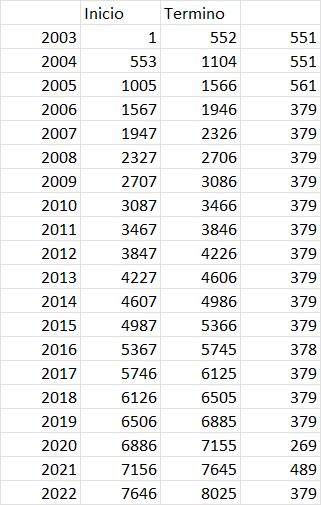

Para obter essa tabela com os valores dos ID de cada ano, foi necessário filtrar toda a primeira para verificar todos os seus primeiros e ultimos ID, para isso foi o dataframe 'df' foi filtrado de acordo com os anos e logo depois foi utilizado os comando .head() e .tail() para verificar os primeiros e ultimos valores.

In [256]:
#Criando novos dataframes por ano
df_2014 = df_gol[(df_gol['partida_id'] >= 4067) & (df_gol['partida_id'] <= 4986)]
df_2015 = df_gol[(df_gol['partida_id'] >= 4987) & (df_gol['partida_id'] <= 5366)]
df_2016 = df_gol[(df_gol['partida_id'] >= 5367) & (df_gol['partida_id'] <= 5745)]
df_2017 = df_gol[(df_gol['partida_id'] >= 5746) & (df_gol['partida_id'] <= 6125)]
df_2018 = df_gol[(df_gol['partida_id'] >= 6126) & (df_gol['partida_id'] <= 6505)]
df_2019 = df_gol[(df_gol['partida_id'] >= 6506) & (df_gol['partida_id'] <= 6885)]
df_2020 = df_gol[(df_gol['partida_id'] >= 6886) & (df_gol['partida_id'] <= 7155)]
df_2021 = df_gol[(df_gol['partida_id'] >= 7156) & (df_gol['partida_id'] <= 7645)]
df_2022 = df_gol[(df_gol['partida_id'] >= 7646) & (df_gol['partida_id'] <= 8025)]

OBS: Como os dados dos gols foram apenas computados a partir de 2014, se fez necessário criar dataframes apenas a partir dessa data.

In [257]:
artilheiros_2014 = df_2014['atleta'].value_counts().head(3)
artilheiros_2015 = df_2015['atleta'].value_counts().head(3)
artilheiros_2016 = df_2016['atleta'].value_counts().head(3)
artilheiros_2017 = df_2017['atleta'].value_counts().head(3)
artilheiros_2018 = df_2018['atleta'].value_counts().head(3)
artilheiros_2019 = df_2019['atleta'].value_counts().head(3)
artilheiros_2020 = df_2020['atleta'].value_counts().head(3)
artilheiros_2021 = df_2021['atleta'].value_counts().head(3)
artilheiros_2022 = df_2022['atleta'].value_counts().head(3)



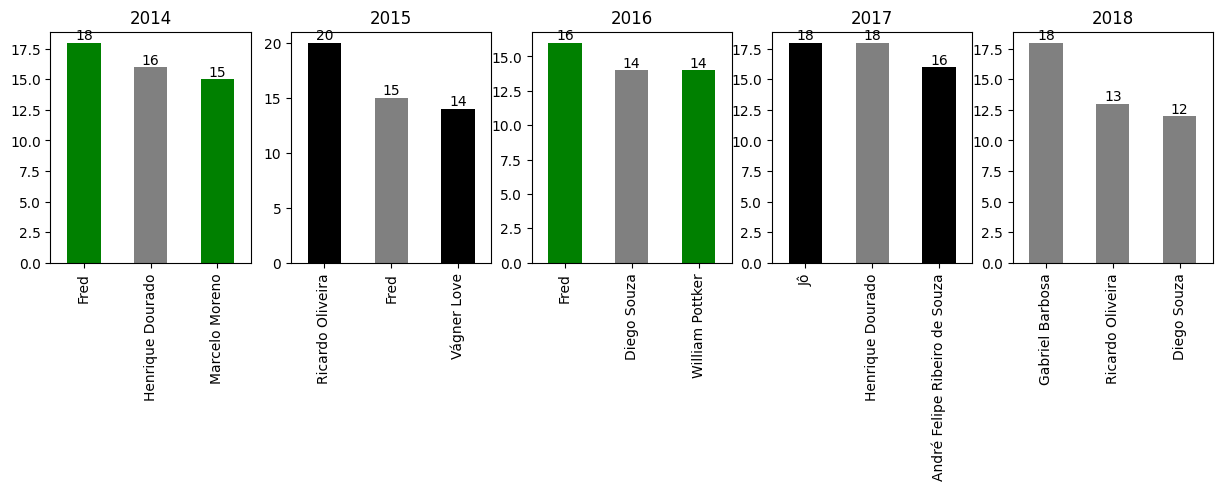

In [258]:
#Criando vários gráficos com todos os artilheiros dos ultimos anos
figure,[ax6,ax7,ax8,ax9, ax10] = plt.subplots(nrows=1,ncols=5,figsize=(15,3))

#Artilheiro 2014
artilheiros_2014.plot(x='jogador', ax = ax6,y = 'gols',kind= 'bar',title = '2014', color=['green', 'grey'])
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2015
artilheiros_2015.plot(x='jogador', ax = ax7 , y ='gols',kind= 'bar',title = '2015',color=['black', 'grey'])
for p in ax7.patches:
    ax7.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2016
artilheiros_2016.plot(x='jogador', ax = ax8 , y ='gols',kind= 'bar',title = '2016', color=['green', 'grey'])
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2017
artilheiros_2017.plot(x='jogador', ax = ax9 , y ='gols',kind= 'bar',title = '2017',color=['black', 'grey'])
for p in ax9.patches:
    ax9.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2018
artilheiros_2018.plot(x='jogador', ax = ax10 , y ='gols',kind= 'bar',title = '2018',color = 'grey')
for p in ax10.patches:
    ax10.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

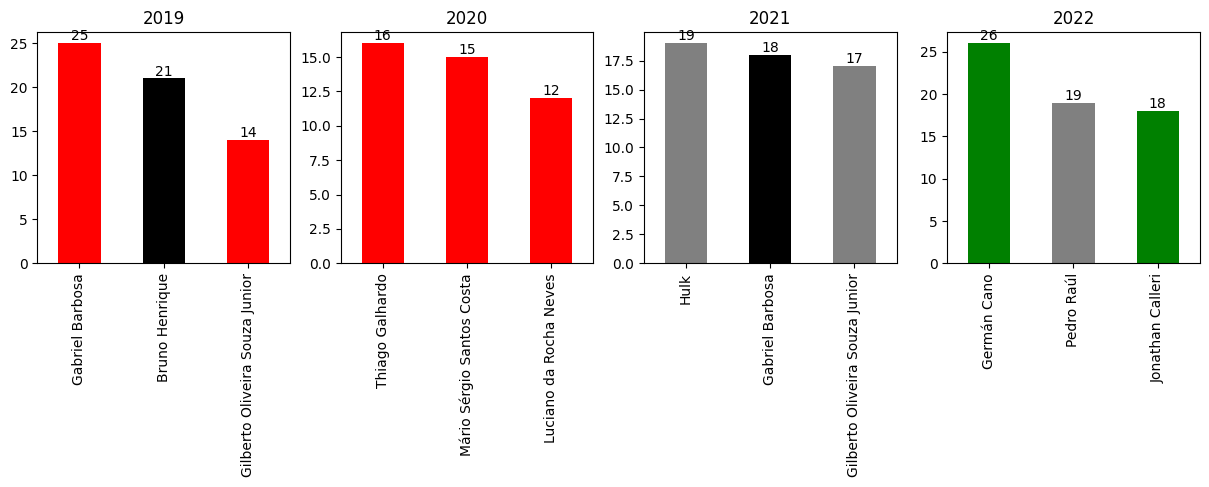

In [259]:
#Criando vários gráficos com todos os artilheiros dos ultimos anos
figure,[ax6,ax7,ax8,ax9] = plt.subplots(nrows=1,ncols=4,figsize=(15,3))

#Artilheiro 2019
artilheiros_2019.plot(x='jogador', ax = ax6,y = 'gols',kind= 'bar',title = '2019', color = ['red','black'])
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2020
artilheiros_2020.plot(x='jogador', ax = ax7 , y ='gols',kind= 'bar',title = '2020', color = ['red'])
for p in ax7.patches:
    ax7.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2021
artilheiros_2021.plot(x='jogador', ax = ax8 , y ='gols',kind= 'bar',title = '2021', color = ['grey','black'])
for p in ax8.patches:
    ax8.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Artilheiro 2022
artilheiros_2022.plot(x='jogador', ax = ax9 , y ='gols',kind= 'bar',title = '2022', color = ['green','grey'])
for p in ax9.patches:
    ax9.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


Como podemos obseervar no gráfico apenas dois atletas conseguiram a proeza de ser artilheiro mais de uma vez no campeonato brasileiro nesse espaço de tempo, sendo que Fred e Gabriel Barbosa foram artilheiros por dois times diferentes Fred(Fluminense e Atletico Mineiro) e Gabriel Barbosa(Santos e Flamengo) a unica diferença além da quantidade de gols foi que Gabriel Barbosa conseguiu ser artilheiro e Campeão no ano.

 O campeonato Brasileiro é uma das competições mais equilibradas que sem é muito dificil conquistar o Campeoanto Brasileiro Duas vezes seguidas foram pouco times que conseguiram essa proeza e os dados analisados mostram muito bem isso. A grande variedade de dados analisados e expostos mostra muito bem isso, onde times que já foram rebaixados tem mais vitorias que times que não foram rebaixados(nesse espaço de tempo analisado), a mudança constante de times que tiveram seus jogadores artilheiros do campeonato entre outros. O campeoanato Brasileiro sempre vai ter suas surpresas e emoções e é por isso que todo ano que passa mais pessoas começam a acompanhar esse campeonato.

## Flamengo

Após uma breve analise do campeonato Brasileiro em geral, esta parte da analise terá como o foco no ultimo campeão da Libertadores e da Copa do Brasil, que no ano de 2019 voltou a venceu a um campeonato internacional depois de 40 anos e desde então todos os anos conquistou ao menos um titulo no ano e este time é o Flamengo.

Fazendo um breve resumo sobre o clube: O Clube de Regatas do Flamengo, conhecido popularmente como Flamengo, é um dos clubes de futebol mais tradicionais e bem-sucedidos do Brasil. Sua história remonta ao início do século XX, mais precisamente ao dia 17 de novembro de 1895, quando foi fundado por um grupo de remadores no Rio de Janeiro.

Inicialmente, o Flamengo era voltado exclusivamente para a prática do remo, daí a inclusão da palavra "Regatas" em seu nome. No entanto, em 1912, o clube decidiu diversificar suas atividades e aderiu ao futebol. A partir de então, o futebol se tornou a principal modalidade esportiva do Flamengo e a que conquistou mais adeptos ao longo dos anos.

Ao longo de sua história, o Flamengo construiu há maior torcida do mundo, conhecida como "Nação Rubro-Negra". Sua torcida é caracterizada pela paixão e pelo apoio incondicional ao clube, comparecendo em massa aos estádios e tornando os jogos do Flamengo uma experiência única.

No futebol, o Flamengo possui um histórico de conquistas significativas. No cenário nacional, o clube foi campeão do Campeonato Brasileiro em oito ocasiões (1980, 1982, 1983, 1987, 1992, 2009, 2019 e 2020) e venceu a Copa do Brasil em quatro oportunidades (1990, 2006, 2013 e 2022). Além disso, o Flamengo é tri campeão da Taça Libertadores da América, a principal competição de clubes da América do Sul, com as conquistas de 1981, 2019, 2022.

Ao longo dos anos, o Flamengo também revelou inúmeros talentos para o futebol brasileiro, como Zico, maior ídolo da história do clube e um dos maiores jogadores da história do futebol brasileiro. Outros jogadores de destaque que passaram pelo Flamengo incluem Júnior, Leandro, Adriano, Bebeto, Romário, Ronaldinho Gaúcho, entre muitos outros.

O Flamengo é reconhecido não apenas pelas conquistas em campo, mas também pela sua grandeza e pela paixão da sua torcida. O clube possui uma história rica e cheia de momentos memoráveis, que o consolidaram como um dos maiores clubes do futebol brasileiro e mundial.


In [260]:
#Criando um dataframe focado apenas no Flamengo
df_flamengo = df_full[df_full.apply(lambda row: row.astype(str).str.contains('Flamengo', case=False).any(), axis=1)].reset_index()

df_flamengo.head()


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,resultado
0,3,1,2003-03-30,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,0
1,17,2,2003-06-04,16:00,Bahia,Flamengo,NaN,NaN,NaN,NaN,Flamengo,Fonte Nova,1,2,BA,RJ,-1
2,48,3,2003-04-13,18:00,Flamengo,Fluminense,NaN,NaN,NaN,NaN,Flamengo,Maracanã,4,1,RJ,RJ,3
3,31,4,2003-04-16,21:40,Sao Caetano,Flamengo,NaN,NaN,NaN,NaN,-,Anacleto Campanella,1,1,SP,RJ,0
4,144,12,2003-04-18,20:30,Flamengo,Cruzeiro,NaN,NaN,NaN,NaN,Flamengo,Maracanã,3,0,RJ,MG,3


In [261]:
df_cpy_2 = df_full.copy()

In [262]:
#Criando um dicionario onde ficará armazenado os anos e os gols do Flamengo
dados_times = {}

#Looping que vai rodar as colunas para encontrar os valores
for mandante, visitante, placar_mandante, placar_visitante, data in zip(df_cpy_2['mandante'], df_cpy_2['visitante'], df_cpy_2['mandante_Placar'], df_cpy_2['visitante_Placar'], df_cpy_2['data']):
    ano = data.year
  #Condicional analisando se ano está no dicionario
    if ano not in dados_times:
        dados_times[ano] = 0

  #Condicional para analisar se mandante é igual a Flamengo
    if mandante == 'Flamengo':
        dados_times[ano] += int(placar_mandante)

  #Condicional para analisar se visitante é igual a Flamengo
    if visitante == 'Flamengo':
        dados_times[ano] += int(placar_visitante)

print(dados_times)

{2003: 66, 2004: 51, 2005: 56, 2006: 44, 2007: 55, 2008: 67, 2009: 58, 2010: 41, 2011: 59, 2012: 39, 2013: 43, 2014: 46, 2015: 45, 2016: 52, 2017: 49, 2018: 59, 2019: 86, 2020: 46, 2021: 91, 2022: 60}


In [263]:
#Criando um dataframe com os dados dos anos e gols do Flamengo
df_flamengo_gols = pd.DataFrame(pd.Series(dados_times))

#Resetando o Index
df_flamengo_gols = df_flamengo_gols.reset_index()

#Renomenado as colunas
df_flamengo_gols.columns = ['Ano', 'Gols']

df_flamengo_gols

,Ano,Gols
0,2003,66
1,2004,51
2,2005,56
3,2006,44
4,2007,55
5,2008,67
6,2009,58
7,2010,41
8,2011,59
9,2012,39


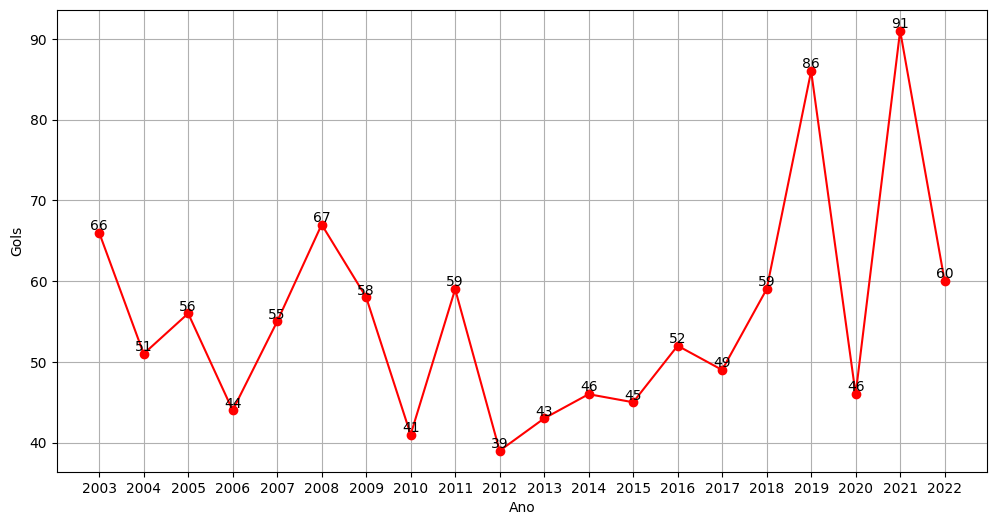

In [264]:
#Criando uma espaço pelo matplotlib com uma coluna e uma linha
figure, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,6))

#Criando um gráfico com os resultados do dataframe
plt.plot(df_flamengo_gols['Ano'], df_flamengo_gols['Gols'], marker = 'o', linestyle = '-', color = 'red', )

#Modificando o titulo
plt.title = ['Pontuação total do flamengo ano']

#Colocando a legenda no eixo x
plt.xlabel('Ano')

#Colocando os valores do dicionario no pontos em X
plt.xticks(df_flamengo_gols['Ano'])

#Colocando legenda no eixo y
plt.ylabel('Gols')

#Alinhando o valores do pontos
for i in range(len(df_flamengo_gols['Ano'])):
    plt.text(df_flamengo_gols['Ano'][i], df_flamengo_gols['Gols'][i], str(df_flamengo_gols['Gols'][i]), ha='center', va='bottom')

#Adicionando as linhas de grade
plt.grid(True)

plt.show()

Com esse gráfico podemos ver o crescimento de rendimento do Flamengo a partir de 2013, onde saiu de uma temporada com 39 gols para uma com 43 e nos anos seguintes essa média foi só aumentando até atingir seu apice em 2019.O ano de 2021 foi dividido com a temporada 2020 devido a pandemia por isso tivemos um indice muito baixo de gols no ano de 2020 e muito alto em 2021.

A quantidade de gols mostra os altos e baixos do time, onde em anos que o time foi menos artilheiro(menos de 45 gols), o time brigou para não rebaixar enqaunto os anos que o time foi mais artilheiro, eles brigaram pelo campeonato.


In [265]:
#Criando uma variavel que tem apenas  os jogos do flamengo
flamengo = df_gol['clube'] == 'Flamengo'

#Criando um dataframe apenas com os jogos do Flamengo
df_flamengo_filtro = df_gol[flamengo]

#Contagem de quantas vezes cada atleta aparece na coluna
atleta_gols = df_flamengo_filtro.atleta.value_counts()

#Filtrando o 10 primeiros
top_10 = atleta_gols.head(10)

#Criando um dataframe com os 10 melhores e seus valores
df_top_10 = pd.DataFrame(top_10).reset_index()

#Renomando uma coluna
df_top_10.columns = ['Atletas', 'Gols']


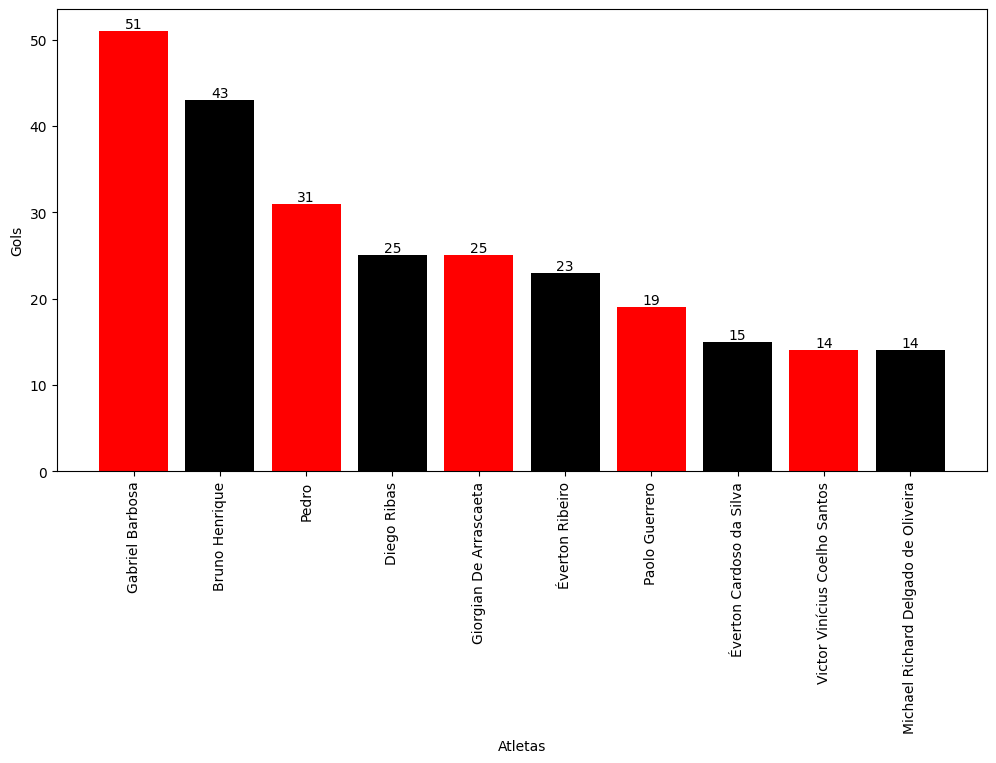

In [266]:
#Criando uma espaço pelo matplotlib com uma coluna e uma linha
figure, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,6))

#Criando um gráfico de barra com os valores encontrados
plt.bar(df_top_10['Atletas'], df_top_10['Gols'], color = ['red', 'black'])

#Criando o ti
plt.title = ['Pontuação total do flamengo ano']

#Colocando a legenda no eixo x
plt.xlabel('Atletas')

#Colocando os valores do dicionario no pontos em X
plt.xticks(df_top_10['Atletas'], rotation = 'vertical')

#Colocando a legenda no eixo y
plt.ylabel('Gols')

#Alinhando o valores do pontos
for i in range(len(df_top_10['Atletas'])):
    plt.text(df_top_10['Atletas'][i], df_top_10['Gols'][i], str(df_top_10['Gols'][i]), ha='center', va='bottom')


plt.grid(False)

plt.show()

O gráfico de artilheiros dos utlimos anos(2003-2022) deixa bem claro como o Flamengo começou a ser mais dominante e artilheiro a partir de 2019 já que os 3 maiores artilheiros são contratações que vieram a partir desse ano.

Gabriel Barbosa continua se destacando como também artilheiro do Flamengo vindo em seguida Bruno Henrique e Pedro, desses três atletas Pedro foi que veio mais tarde na temporada de 2020 mas em 2021/2022 teve um maior destaque e presença em campo, já Bruno Henrique devido a uma grave lesão ficou fora de toda a temporada de 2022.

O futebol é uma paixão nacional e a maioria dos brasileiro torce, vibra, sofre pelo seu time, mas além disso o futebol são números e com ele podemos tirar diversos insights que podem nos favorecer em diversar situações, muitos times hoje em dia já se utilizam de dados para conhecer os jogadores antes mesmo de eles chegarem ao time um dos casos mais conhecidos é do time inglês Liverpool que hoje em dia tem uma equipe especilista em analise trabalhando diretamento com a comissão técnica.

Os dados são uma fonte de conhecimento que apenas quem analisa-lo vai obter informações que realmente podem fazer uma diferença ao longo da temporada, o futebol é amor, paixão, emoção e também Dados.